


# ***ML Data Cleaning and Feature Selection***


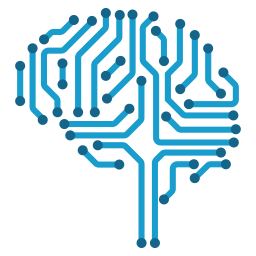

In this notebook, we will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

What are the data types? (Only numeric and categorical)

Are there missing values?

What are the likely distributions of the numeric variables?

Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Which independent variables have missing data? How much?

Do the training and test sets have the same data?

In the predictor variables independent of all the other predictor variables?

Which predictor variables are the most important?

Do the ranges of the predictor variables make sense?

What are the distributions of the predictor variables?

Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

Imputation Methods for Missing Data https://www.youtube.com/watch?v=fYhr8eF1ubo (Links to an external site.)

Nice EDA notebook https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python (Links to an external site.)

Scoring Rubric

Are my answers supported with data? (20 Points)
Tables, graphs, and charts must support your evaluation/answers.

It MUST run in Google Collab. You will also save the Google Collab notebook as a .ipynb notebook and upload that to Canvas . (5 Points)

Public dataset (5 Points)
Pick a public dataset that can be used for Regression or Classification. You MUST get approval for your dataset from the TAs.

What code is yours and what have you adapted? (5 Points)
You must explain what code you wrote and what you have done that is different. Failure to cite ANY code will result in a zero for this section.

Did I explain my code clearly? (15 Points)
Your code review score will be scaled to a range of 0 to 10 and be used for this score.

Did I explain my licensing clearly? (5 Points)
Failure to cite a clear license will result in a zero for this section.

Answers to listed questions (45 Points)
Which independent variables are useful to predict a target (dependent variable)?

Which independent variable have missing data? How much?

Do the training and test sets have the same data?

In the predictor variables independent of all the other predictor variables?

Which predictor variables are the most important?

Do the ranges of the predictor variables make sense?

What are the distributions of the predictor variables?

---


# 1. Overview

About the data:
Zillow's Economic Research Team collects, cleans and publishes housing and economic data from a variety of public and proprietary sources. Public property record data filed with local municipalities -- including deeds, property facts, parcel information and transactional histories -- forms the backbone of our data products, and is fleshed out with proprietary data derived from property listings and user behavior on Zillow.

The large majority of Zillow's aggregated housing market and economic data is made available for free download at zillow.com/data.

Reference:- https://www.kaggle.com/datasets/zillow/zecon

Data Files available are: cities_crosswalk.csv, City_time_series.csv, County_time_series.csv, CountyCrossWalk_Zillow.csv, DataDictionary.csv, Metro_time_series.csv, Neighborhood_time_series.csv, Neighborhood_time_series.csv, State_time_series.csv, Zip_time_series.csv

Here particularly we would be focusing on the State_time_series.csv. The time series data is time-dependent; samples are taken at a constant time interval i.e. the data on every month-end for multiple states.

# ***2. Importing Libraries*** 

In [1]:
!pip install eli5
import pandas as pd #Pandas will help us in data manipulation and more cool stuff
import numpy as np  #A mathematical library which is not cool. to much math.
import seaborn as sns #Helps in plotting beautiful graphs and plots
import matplotlib 
import matplotlib.pyplot as plt #Helps in plotting beautiful graphs and plots
from sklearn.linear_model import LogisticRegression #Helps in building Logistic regression Model
from sklearn.tree import DecisionTreeClassifier #Helps in Building Decision Tree Model
from sklearn.model_selection import train_test_split #Helps in sampling the data into test and train with same distribution in both
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from pandas.api.types import is_string_dtype,is_numeric_dtype
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
print('*** Libraries loaded ***')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

*** Libraries loaded ***


# ***3. Data Loading***


---

Data Description: As previously mentioned this data is provided by the Zillow Economics Reserach Team gathered from various public and private resources.
This data will help us under stand the real estate trends of the market based on various factors the includes the property location, property type, etc.
Review Variables

Below mentioned variable play a key role in the demonstrated notebook.

Zillow Home Value Index (ZHVI): A smoothed seasonally adjusted measure of the median estimated home value across a given region and housing type. A dollar denominated alternative to repeat-sales indices. Find a more detailed methodology here: http://www.zillow.com/research/zhvi-methodology-6032/

Zillow Rent Index (ZRI): A smoothed seasonally adjusted measure of the median estimated market rate rent across a given region and housing type. A dollar denominated alternative to repeat-rent indices. Find a more detailed methodology here: http://www.zillow.com/research/zillow-rent-index-methodology-2393/
      
For more details on the dataset and variables visit https://www.kaggle.com/datasets/zillow/zecon?select=State_time_series.csv  
            
>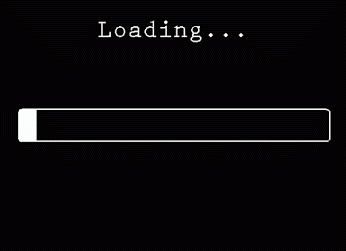



In [2]:
# We will use pandas to read the data
# from this cell we use "pd" as a shortform for pandas library, (you can give any name)
state_time_series = "input/State_time_series.csv"
df = pd.read_csv(state_time_series)

3.1 Descriptive Statistics about the Dataset

In [3]:
df.head()# print the top five rows of the dataset. By default the head method returns top five records. 


Date  RegionName  DaysOnZillow_AllHomes  \
0  1996-04-30     Alabama                    NaN   
1  1996-04-30     Arizona                    NaN   
2  1996-04-30    Arkansas                    NaN   
3  1996-04-30  California                    NaN   
4  1996-04-30    Colorado                    NaN   

   InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  \
0                                   NaN                    NaN   
1                                   NaN                    NaN   
2                                   NaN                    NaN   
3                                   NaN                    NaN   
4                                   NaN                    NaN   

   MedianListingPricePerSqft_1Bedroom  MedianListingPricePerSqft_2Bedroom  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

   MedianListingPricePerSqft_3Bedroom  MedianListingPricePerSqft_4Bedroom  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

   MedianListingPricePerSqft_5BedroomOrMore  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   MedianListingPricePerSqft_AllHomes  MedianListingPricePerSqft_CondoCoop  \
0                                 NaN                                  NaN   
1                                 NaN                                  NaN   
2                                 NaN                                  NaN   
3                                 NaN                                  NaN   
4                                 NaN                                  NaN   

   MedianListingPricePerSqft_DuplexTriplex  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   MedianListingPricePerSqft_SingleFamilyResidence  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

   MedianListingPrice_1Bedroom  MedianListingPrice_2Bedroom  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   MedianListingPrice_3Bedroom  MedianListingPrice_4Bedroom  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   MedianListingPrice_5BedroomOrMore  MedianListingPrice_AllHomes  \
0                                NaN                          NaN   
1                                NaN                          NaN   
2                                NaN                  

In [4]:
print("The data has",df.shape[0],"rows and", df.shape[1],"columns") #shape fucntions gives rows x columns value of the data
print("")
print("Data type of each column\n",df.dtypes) #dtypes function helps us know the type of all the columns types so that we dont mess up.

The data has 13212 rows and 82 columns

Data type of each column
 Date                                                              object
RegionName                                                        object
DaysOnZillow_AllHomes                                            float64
InventorySeasonallyAdjusted_AllHomes                             float64
InventoryRaw_AllHomes                                            float64
MedianListingPricePerSqft_1Bedroom                               float64
MedianListingPricePerSqft_2Bedroom                               float64
MedianListingPricePerSqft_3Bedroom                               float64
MedianListingPricePerSqft_4Bedroom                               float64
MedianListingPricePerSqft_5BedroomOrMore                         float64
MedianListingPricePerSqft_AllHomes                               float64
MedianListingPricePerSqft_CondoCoop                              float64
MedianListingPricePerSqft_DuplexTriplex                   

3.3 What are the distributions of the columns?

-Univariate Analysis: Histogram

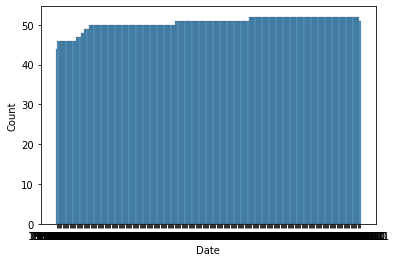

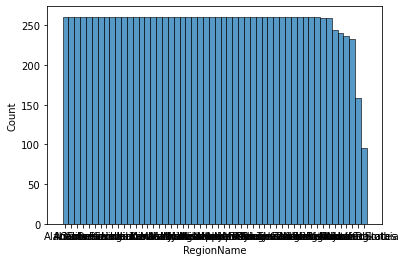

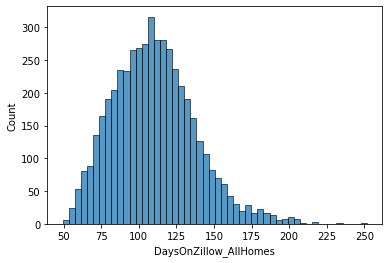

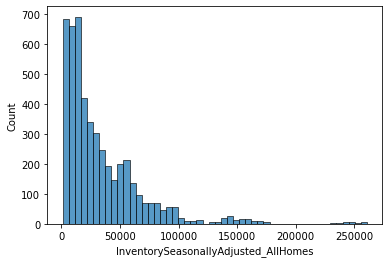

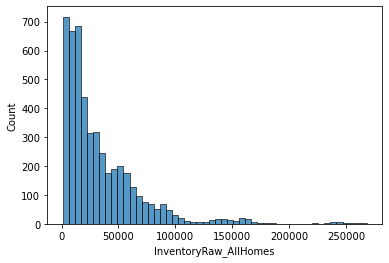

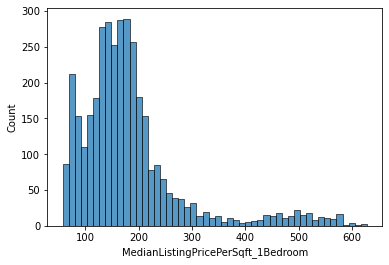

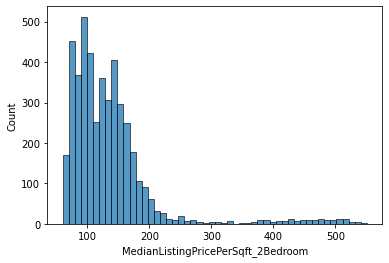

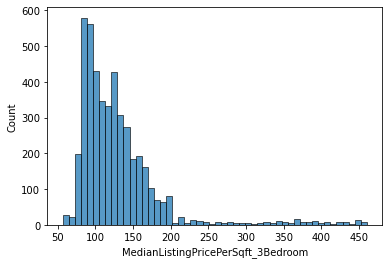

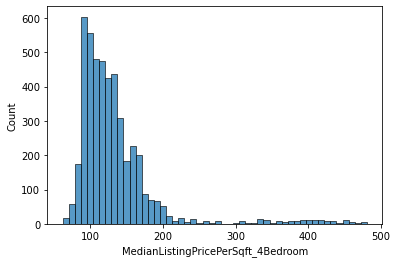

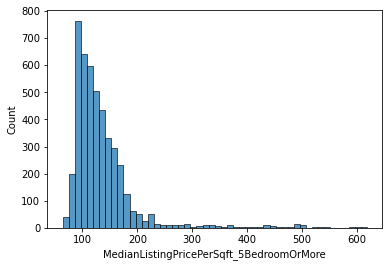

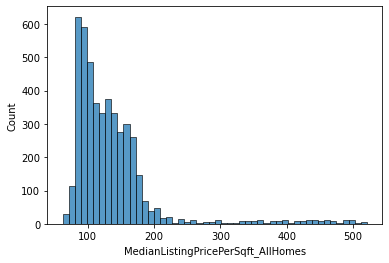

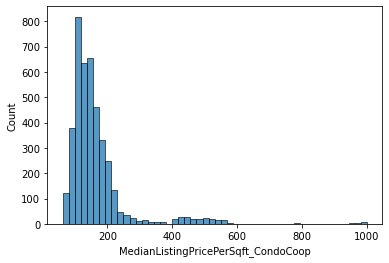

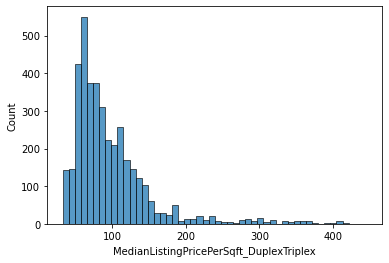

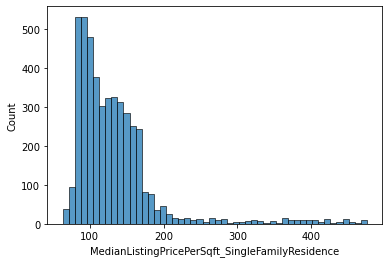

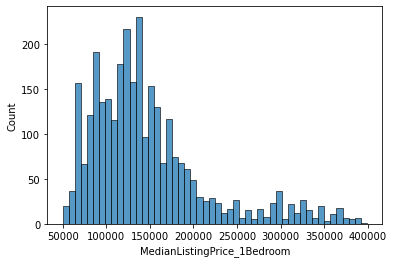

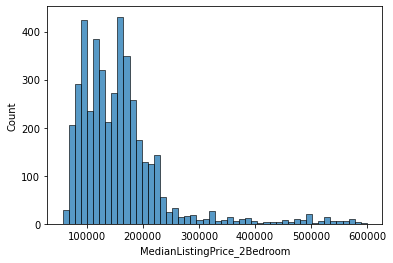

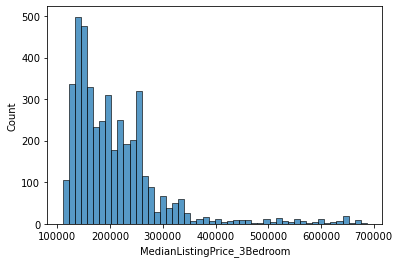

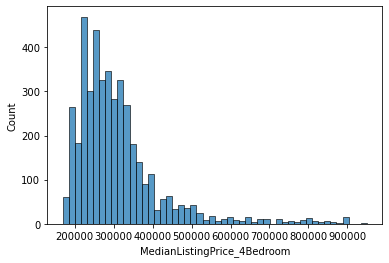

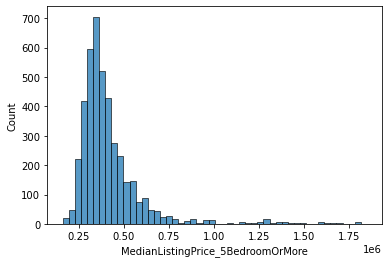

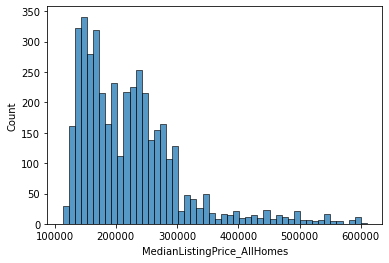

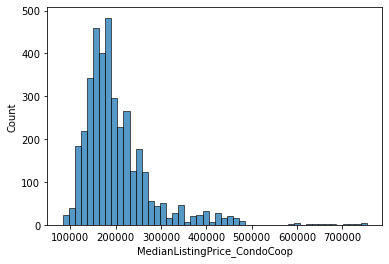

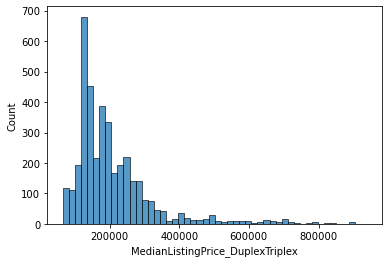

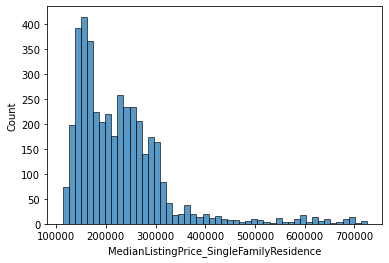

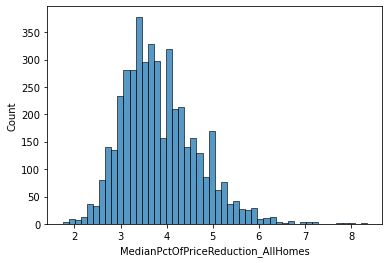

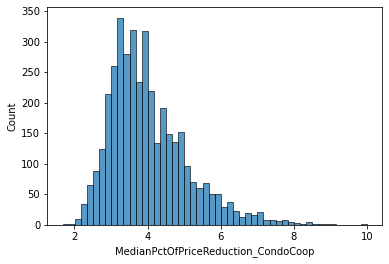

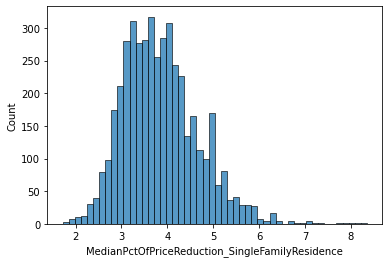

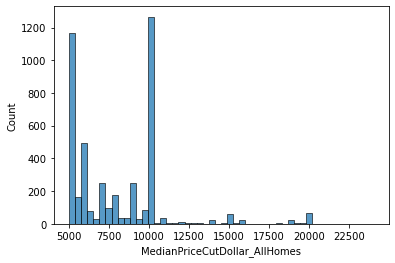

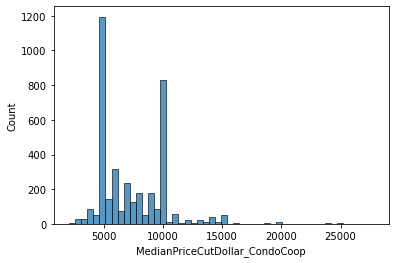

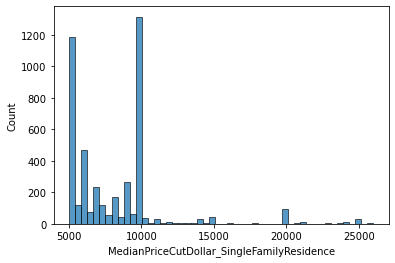

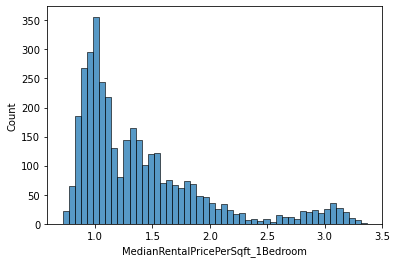

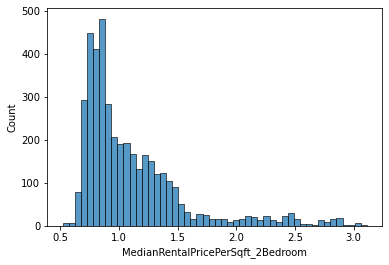

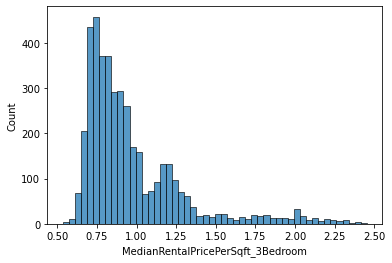

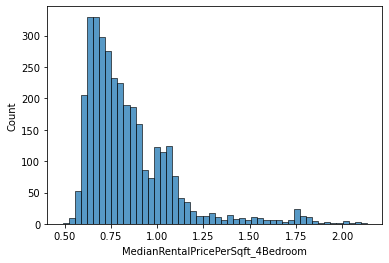

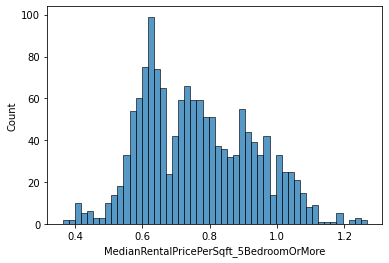

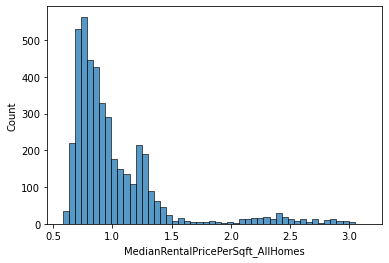

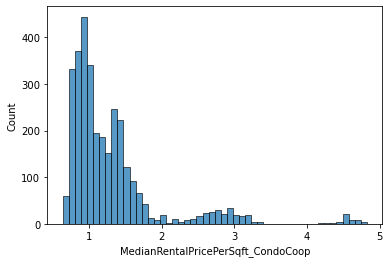

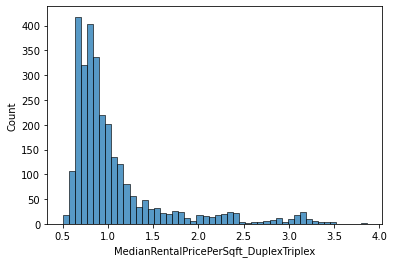

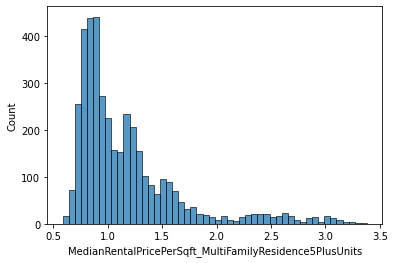

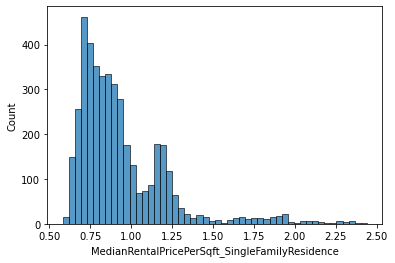

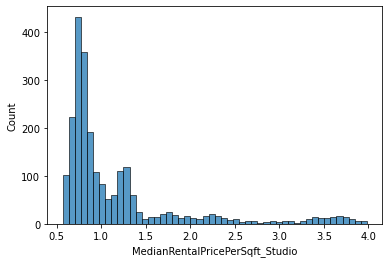

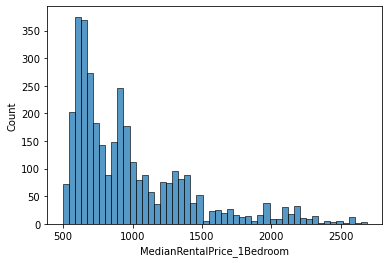

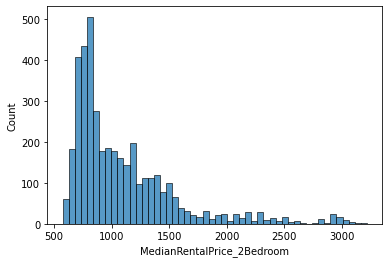

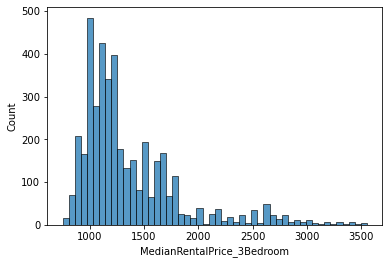

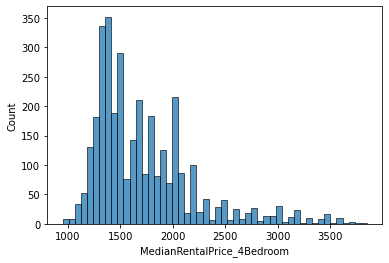

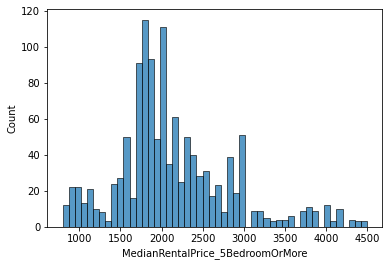

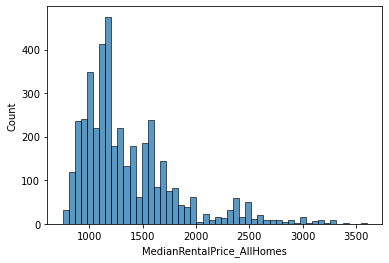

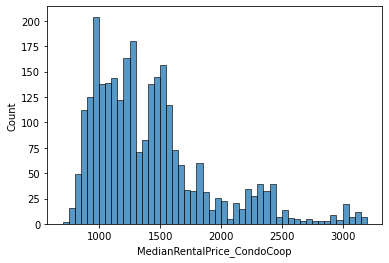

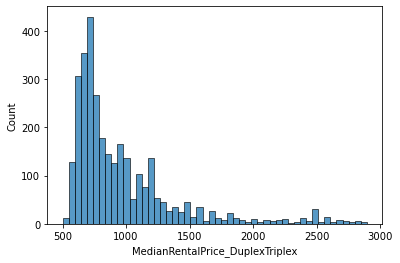

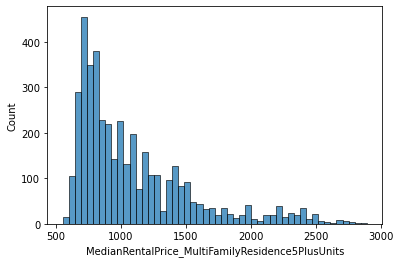

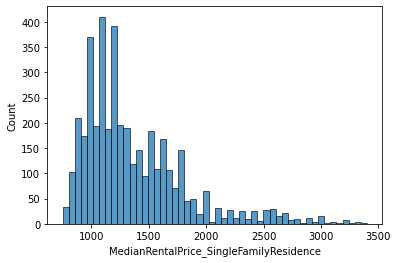

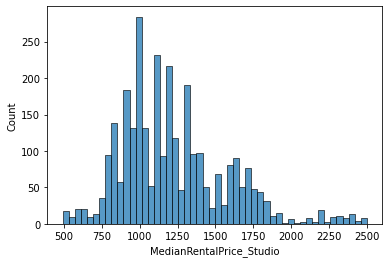

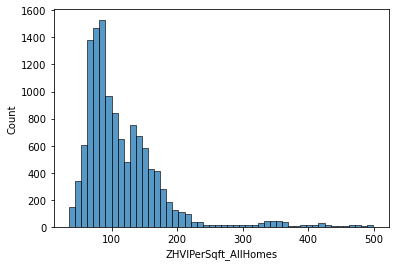

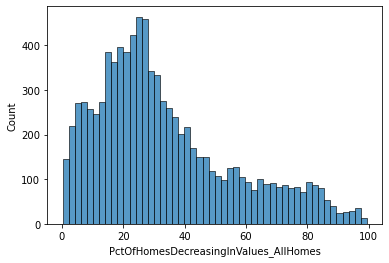

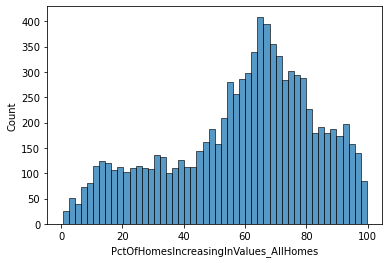

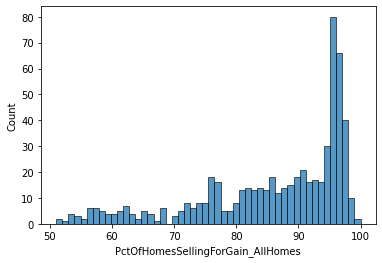

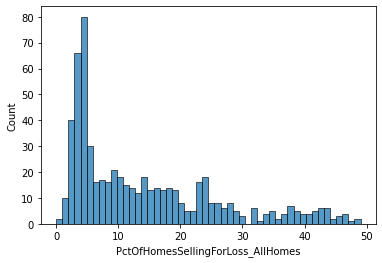

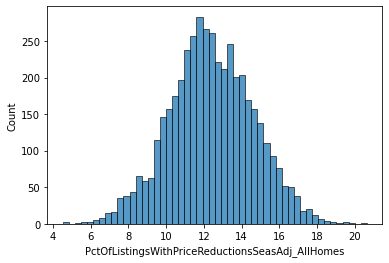

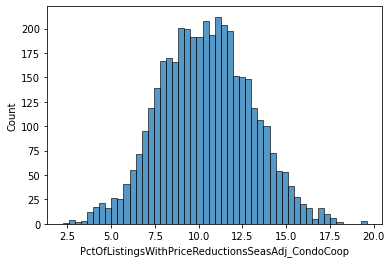

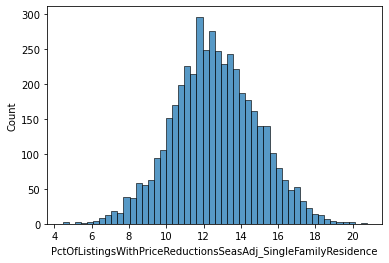

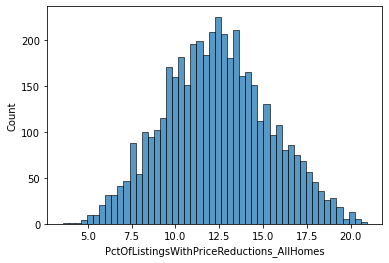

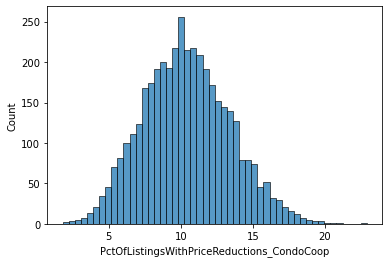

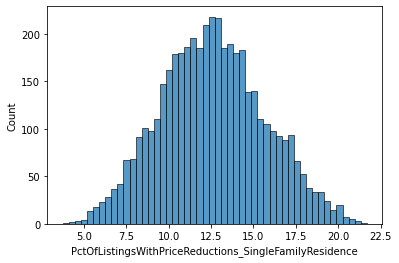

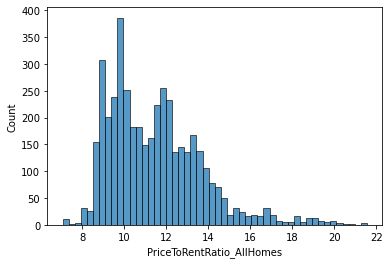

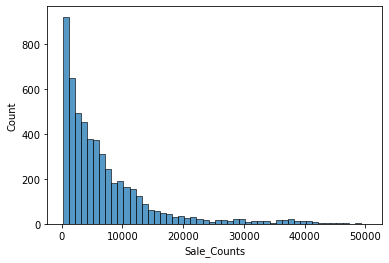

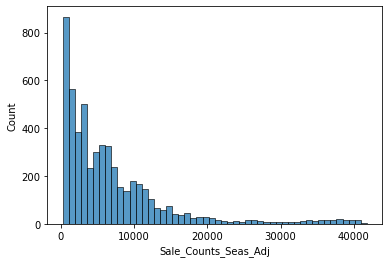

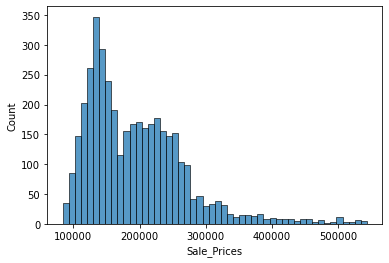

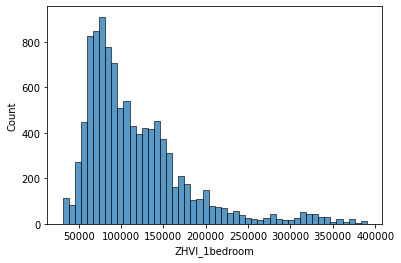

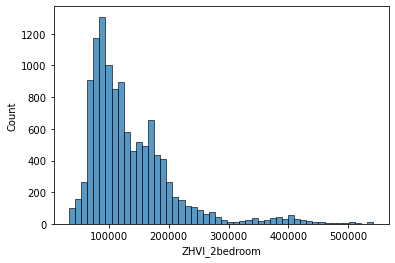

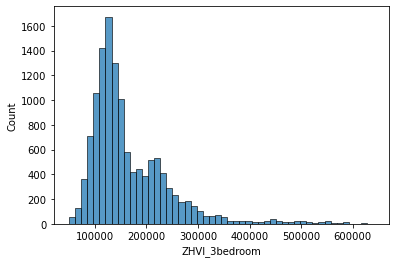

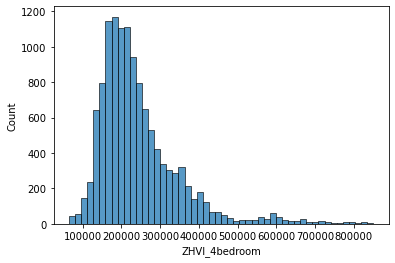

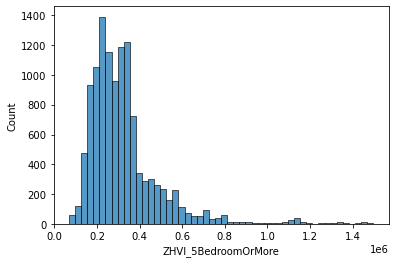

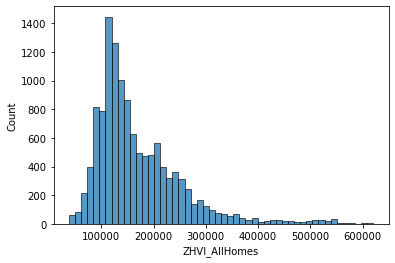

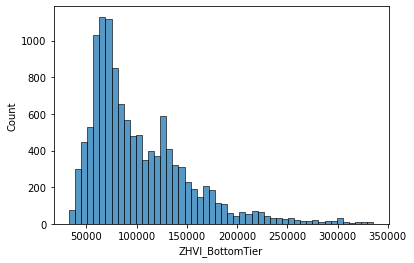

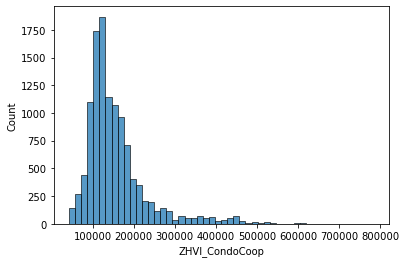

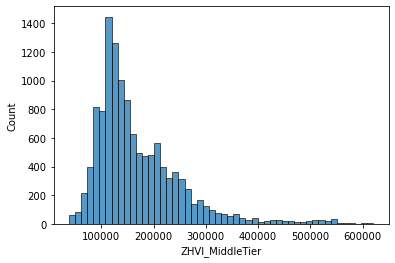

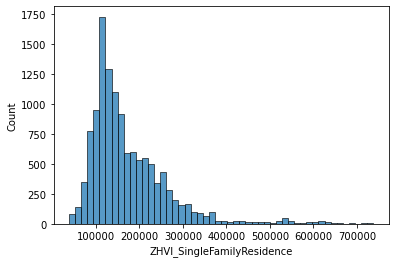

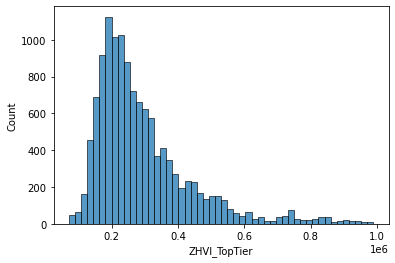

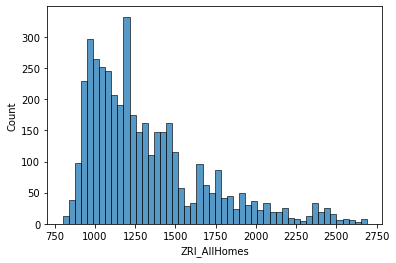

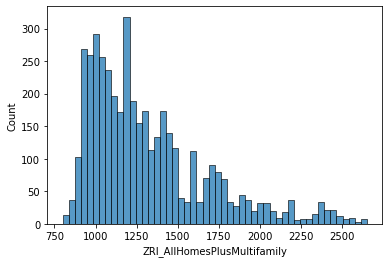

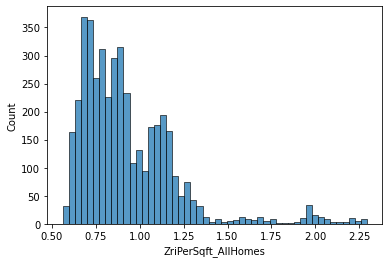

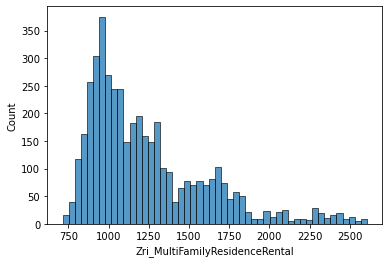

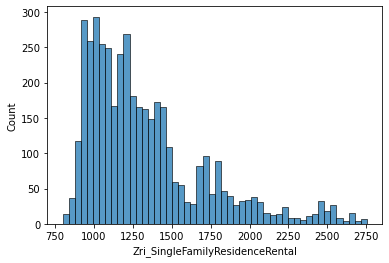

In [5]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col],bins=50)

3.4 Plotting the Region wise sorted values for the dataset

<AxesSubplot:xlabel='RegionName'>

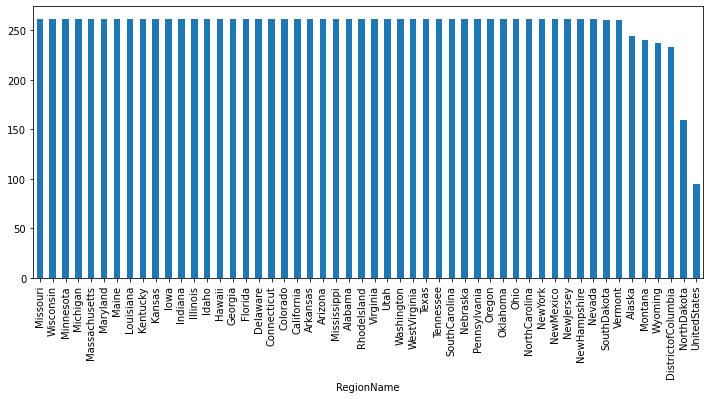

In [6]:
plt.rcParams['figure.figsize']=(12,5)
df.RegionName.groupby(df.RegionName).count().sort_values()[::-1].plot(kind="bar")


Looks like the states are evenly distributed with with few outliers such as North Dakota have the least number of entries, This implies that there are less houses entries from United States followed by North Dakota

# 4. DATA PREPROCESSING 

4.1. Finding missing values


In [7]:
# Checking for null values in dataframe
df.isna().sum()

Date                                                                 0
RegionName                                                           0
DaysOnZillow_AllHomes                                             8367
InventorySeasonallyAdjusted_AllHomes                              8316
InventoryRaw_AllHomes                                             8316
MedianListingPricePerSqft_1Bedroom                                9626
MedianListingPricePerSqft_2Bedroom                                8678
MedianListingPricePerSqft_3Bedroom                                8605
MedianListingPricePerSqft_4Bedroom                                8535
MedianListingPricePerSqft_5BedroomOrMore                          8643
MedianListingPricePerSqft_AllHomes                                8538
MedianListingPricePerSqft_CondoCoop                               9063
MedianListingPricePerSqft_DuplexTriplex                           9248
MedianListingPricePerSqft_SingleFamilyResidence                   8573
Median

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13212 entries, 0 to 13211
Data columns (total 82 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Date                                                           13212 non-null  object 
 1   RegionName                                                     13212 non-null  object 
 2   DaysOnZillow_AllHomes                                          4845 non-null   float64
 3   InventorySeasonallyAdjusted_AllHomes                           4896 non-null   float64
 4   InventoryRaw_AllHomes                                          4896 non-null   float64
 5   MedianListingPricePerSqft_1Bedroom                             3586 non-null   float64
 6   MedianListingPricePerSqft_2Bedroom                             4534 non-null   float64
 7   MedianListingPricePerSqft_3Bedroom                        

4.2 Count and percentage of missing values

In [9]:
#Lets find missing value columns
missing_list = df.columns[df.isna().any()].tolist() 
missing_count = []      
for i in missing_list:
  missing_count.append(sum(pd.isnull(df[str(i)])))

d = {'Missing_Column':missing_list,'Missing_Values':missing_count}
Missing_DF = pd.DataFrame(d)
Missing_DF["%_Missing"] = (Missing_DF['Missing_Values'] / df.shape[0]) * 100
Missing_DF


Missing_Column  Missing_Values  \
0                               DaysOnZillow_AllHomes            8367   
1                InventorySeasonallyAdjusted_AllHomes            8316   
2                               InventoryRaw_AllHomes            8316   
3                  MedianListingPricePerSqft_1Bedroom            9626   
4                  MedianListingPricePerSqft_2Bedroom            8678   
5                  MedianListingPricePerSqft_3Bedroom            8605   
6                  MedianListingPricePerSqft_4Bedroom            8535   
7            MedianListingPricePerSqft_5BedroomOrMore            8643   
8                  MedianListingPricePerSqft_AllHomes            8538   
9                 MedianListingPricePerSqft_CondoCoop            9063   
10            MedianListingPricePerSqft_DuplexTriplex            9248   
11    MedianListingPricePerSqft_SingleFamilyResidence            8573   
12                        MedianListingPrice_1Bedroom           10205   
13                        MedianListingPrice_2Bedroom            8839   
14                        MedianListingPrice_3Bedroom            8842   
15                        MedianListingPrice_4Bedroom            8876   
16                  MedianListingPrice_5BedroomOrMore            8989   
17                        MedianListingPrice_AllHomes            8966   
18                       MedianListingPrice_CondoCoop            9402   
19                   MedianListingPrice_DuplexTriplex            9323   
20           MedianListingPrice_SingleFamilyResidence            9082   
21                 MedianPctOfPriceReduction_AllHomes            8724   
22                MedianPctOfPriceReduction_CondoCoop            9340   
23    MedianPctOfPriceReduction_SingleFamilyResidence            8724   
24                      MedianPriceCutDollar_AllHomes            8724   
25                     MedianPriceCutDollar_CondoCoop            9340   
26         MedianPriceCutDollar_SingleFamilyResidence            8724   
27                  MedianRentalPricePerSqft_1Bedroom            9588   
28                  MedianRentalPricePerSqft_2Bedroom            9065   
29                  MedianRentalPricePerSqft_3Bedroom            8985   
30                  MedianRentalPricePerSqft_4Bedroom            9808   
31            MedianRentalPricePerSqft_5BedroomOrMore           11752   
32                  MedianRentalPricePerSqft_AllHomes            8864   
33                 MedianRentalPricePerSqft_CondoCoop           10004   
34             MedianRentalPricePerSqft_DuplexTriplex           10293   
35  MedianRentalPricePerSqft_MultiFamilyResidence5...            9189   
36     MedianRentalPricePerSqft_SingleFamilyResidence            8923   
37                    MedianRentalPricePerSqft_Studio           10875   
38                         MedianRentalPrice_1Bedroom            9686   
39                         MedianRentalPrice_2Bedroom            9168   
40                         MedianRentalPrice_3Bedroom            9075   
41                         MedianRentalPrice_4Bedroom            9856   
42                   MedianRentalPrice_5BedroomOrMore           11994   
43                         MedianRentalPrice_AllHomes            9060   
44                        MedianRentalPrice_CondoCoop           10437   
45                    MedianRentalPrice_DuplexTriplex           10068   
46   MedianRentalPrice_MultiFamilyResidence5PlusUnits            9029   
47            MedianRentalPrice_SingleFamilyResidence            9120   
48                           MedianRentalPrice_Studio           10211   
49                               ZHVIPerSqft_AllHomes             620   
50              PctOfHomesDecreasingInValues_AllHomes            4292   
51              PctOfHomesIncreasingInValues_AllHomes            4292   
52                  PctOfHomesSellingForGain_AllHomes           12609   
53                  PctOfHomesSellingForLoss_AllHomes           12609   
54   PctOfListingsWithPr

We have received the percentage of missing values for all the columns.

In [10]:
df['Sale_Prices'].fillna(value=df['Sale_Prices'].median(), inplace=True)

4.3 Removing columns

Removing columns with more that 50 % missing values except 'Sales_Prices' column as its the Target variable

In [11]:
# Removing columns with more than 50% missing values
prop_missing_value = 0.50
df = df.dropna(thresh=(1-prop_missing_value) * len(df), axis=1)

In [12]:
df.head()

Date  RegionName  ZHVIPerSqft_AllHomes  \
0  1996-04-30     Alabama                  50.0   
1  1996-04-30     Arizona                  62.0   
2  1996-04-30    Arkansas                  42.0   
3  1996-04-30  California                 102.0   
4  1996-04-30    Colorado                  82.0   

   PctOfHomesDecreasingInValues_AllHomes  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   PctOfHomesIncreasingInValues_AllHomes  Sale_Prices  ZHVI_1bedroom  \
0                                    NaN     180900.0        61500.0   
1                                    NaN     180900.0        59200.0   
2                                    NaN     180900.0        53000.0   
3                                    NaN     180900.0        93700.0   
4                                    NaN     180900.0        77800.0   

   ZHVI_2bedroom  ZHVI_3bedroom  ZHVI_4bedroom  ZHVI_5BedroomOrMore  \
0        48900.0        78200.0       146500.0             206300.0   
1        86400.0        96100.0       128400.0             190500.0   
2        54500.0        76800.0       135100.0             186000.0   
3       123400.0       150900.0       196100.0             265300.0   
4        97500.0       129000.0       176100.0             212900.0   

   ZHVI_AllHomes  ZHVI_BottomTier  ZHVI_CondoCoop  ZHVI_MiddleTier  \
0        79500.0          45600.0         99500.0          79500.0   
1       103600.0          67100.0         78900.0         103600.0   
2        64400.0          38400.0         70300.0          64400.0   
3       157900.0          95100.0        136100.0         157900.0   
4       128100.0          82700.0         99400.0         128100.0   

   ZHVI_SingleFamilyResidence  ZHVI_TopTier  
0                     79000.0      140200.0  
1                    107500.0      168700.0  
2                     64500.0      115200.0  
3                    162000.0      270600.0  
4                    133600.0      209300.0

4.4 Filling missing values

Filling the missing values of the columns with the median value

In [13]:
for column in df:
    if (column == 'Date' or column == 'RegionName'):
        continue
    else:    
        df[column].fillna(value=df[column].median(), inplace=True)

In [14]:
df.isna().sum()

Date                                     0
RegionName                               0
ZHVIPerSqft_AllHomes                     0
PctOfHomesDecreasingInValues_AllHomes    0
PctOfHomesIncreasingInValues_AllHomes    0
Sale_Prices                              0
ZHVI_1bedroom                            0
ZHVI_2bedroom                            0
ZHVI_3bedroom                            0
ZHVI_4bedroom                            0
ZHVI_5BedroomOrMore                      0
ZHVI_AllHomes                            0
ZHVI_BottomTier                          0
ZHVI_CondoCoop                           0
ZHVI_MiddleTier                          0
ZHVI_SingleFamilyResidence               0
ZHVI_TopTier                             0
dtype: int64

In [15]:
df=df.drop(['Date', 'RegionName'], axis=1)

4.5 Plotting Corelation graph

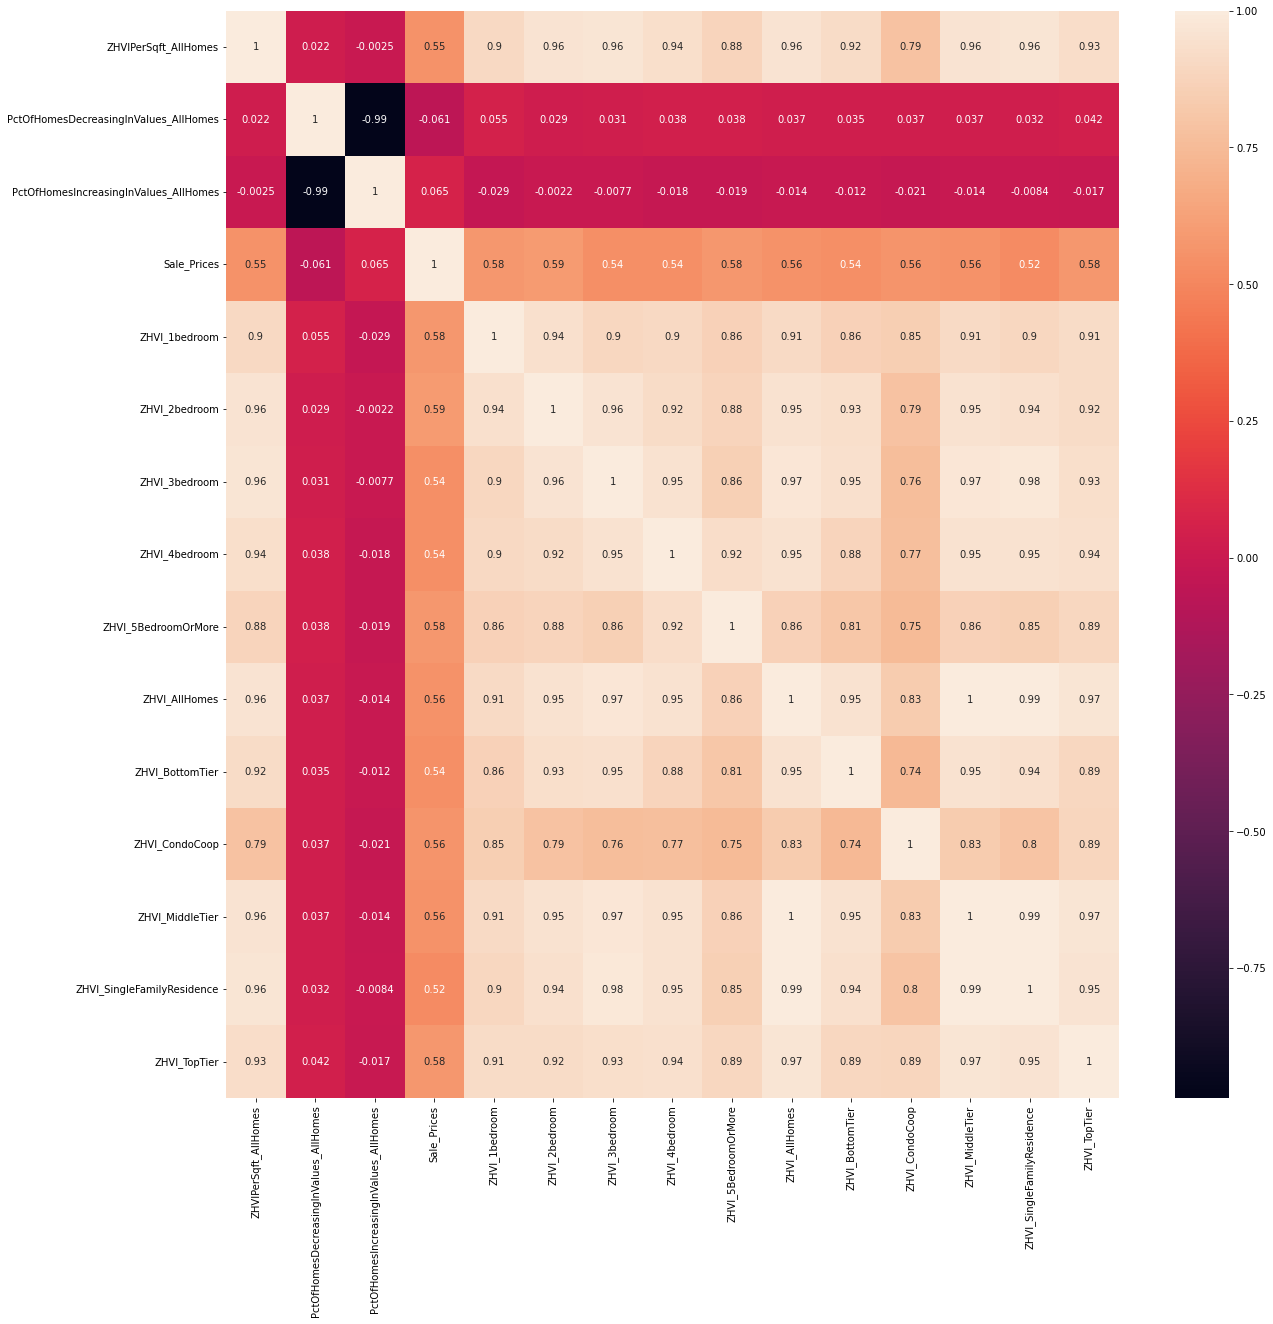

In [16]:
#Corelation plots among all features
plt.figure(figsize=(20,20))
corr_df=df.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

It depicts the correlation of all the variables against the other variables to show the dependency between them.


The correlation close to 1 indicates that it is strongly correlated, and the values closer to 0 are a weak correlation,

We can see that the data is highly corelated except columns 'PctOfHomesDecreasingInValues_AllHomes' and 'PctOfHomesIncreasingInValues_AllHomes' which displays a negative value which is -0.99. So we can remove one of these columns.

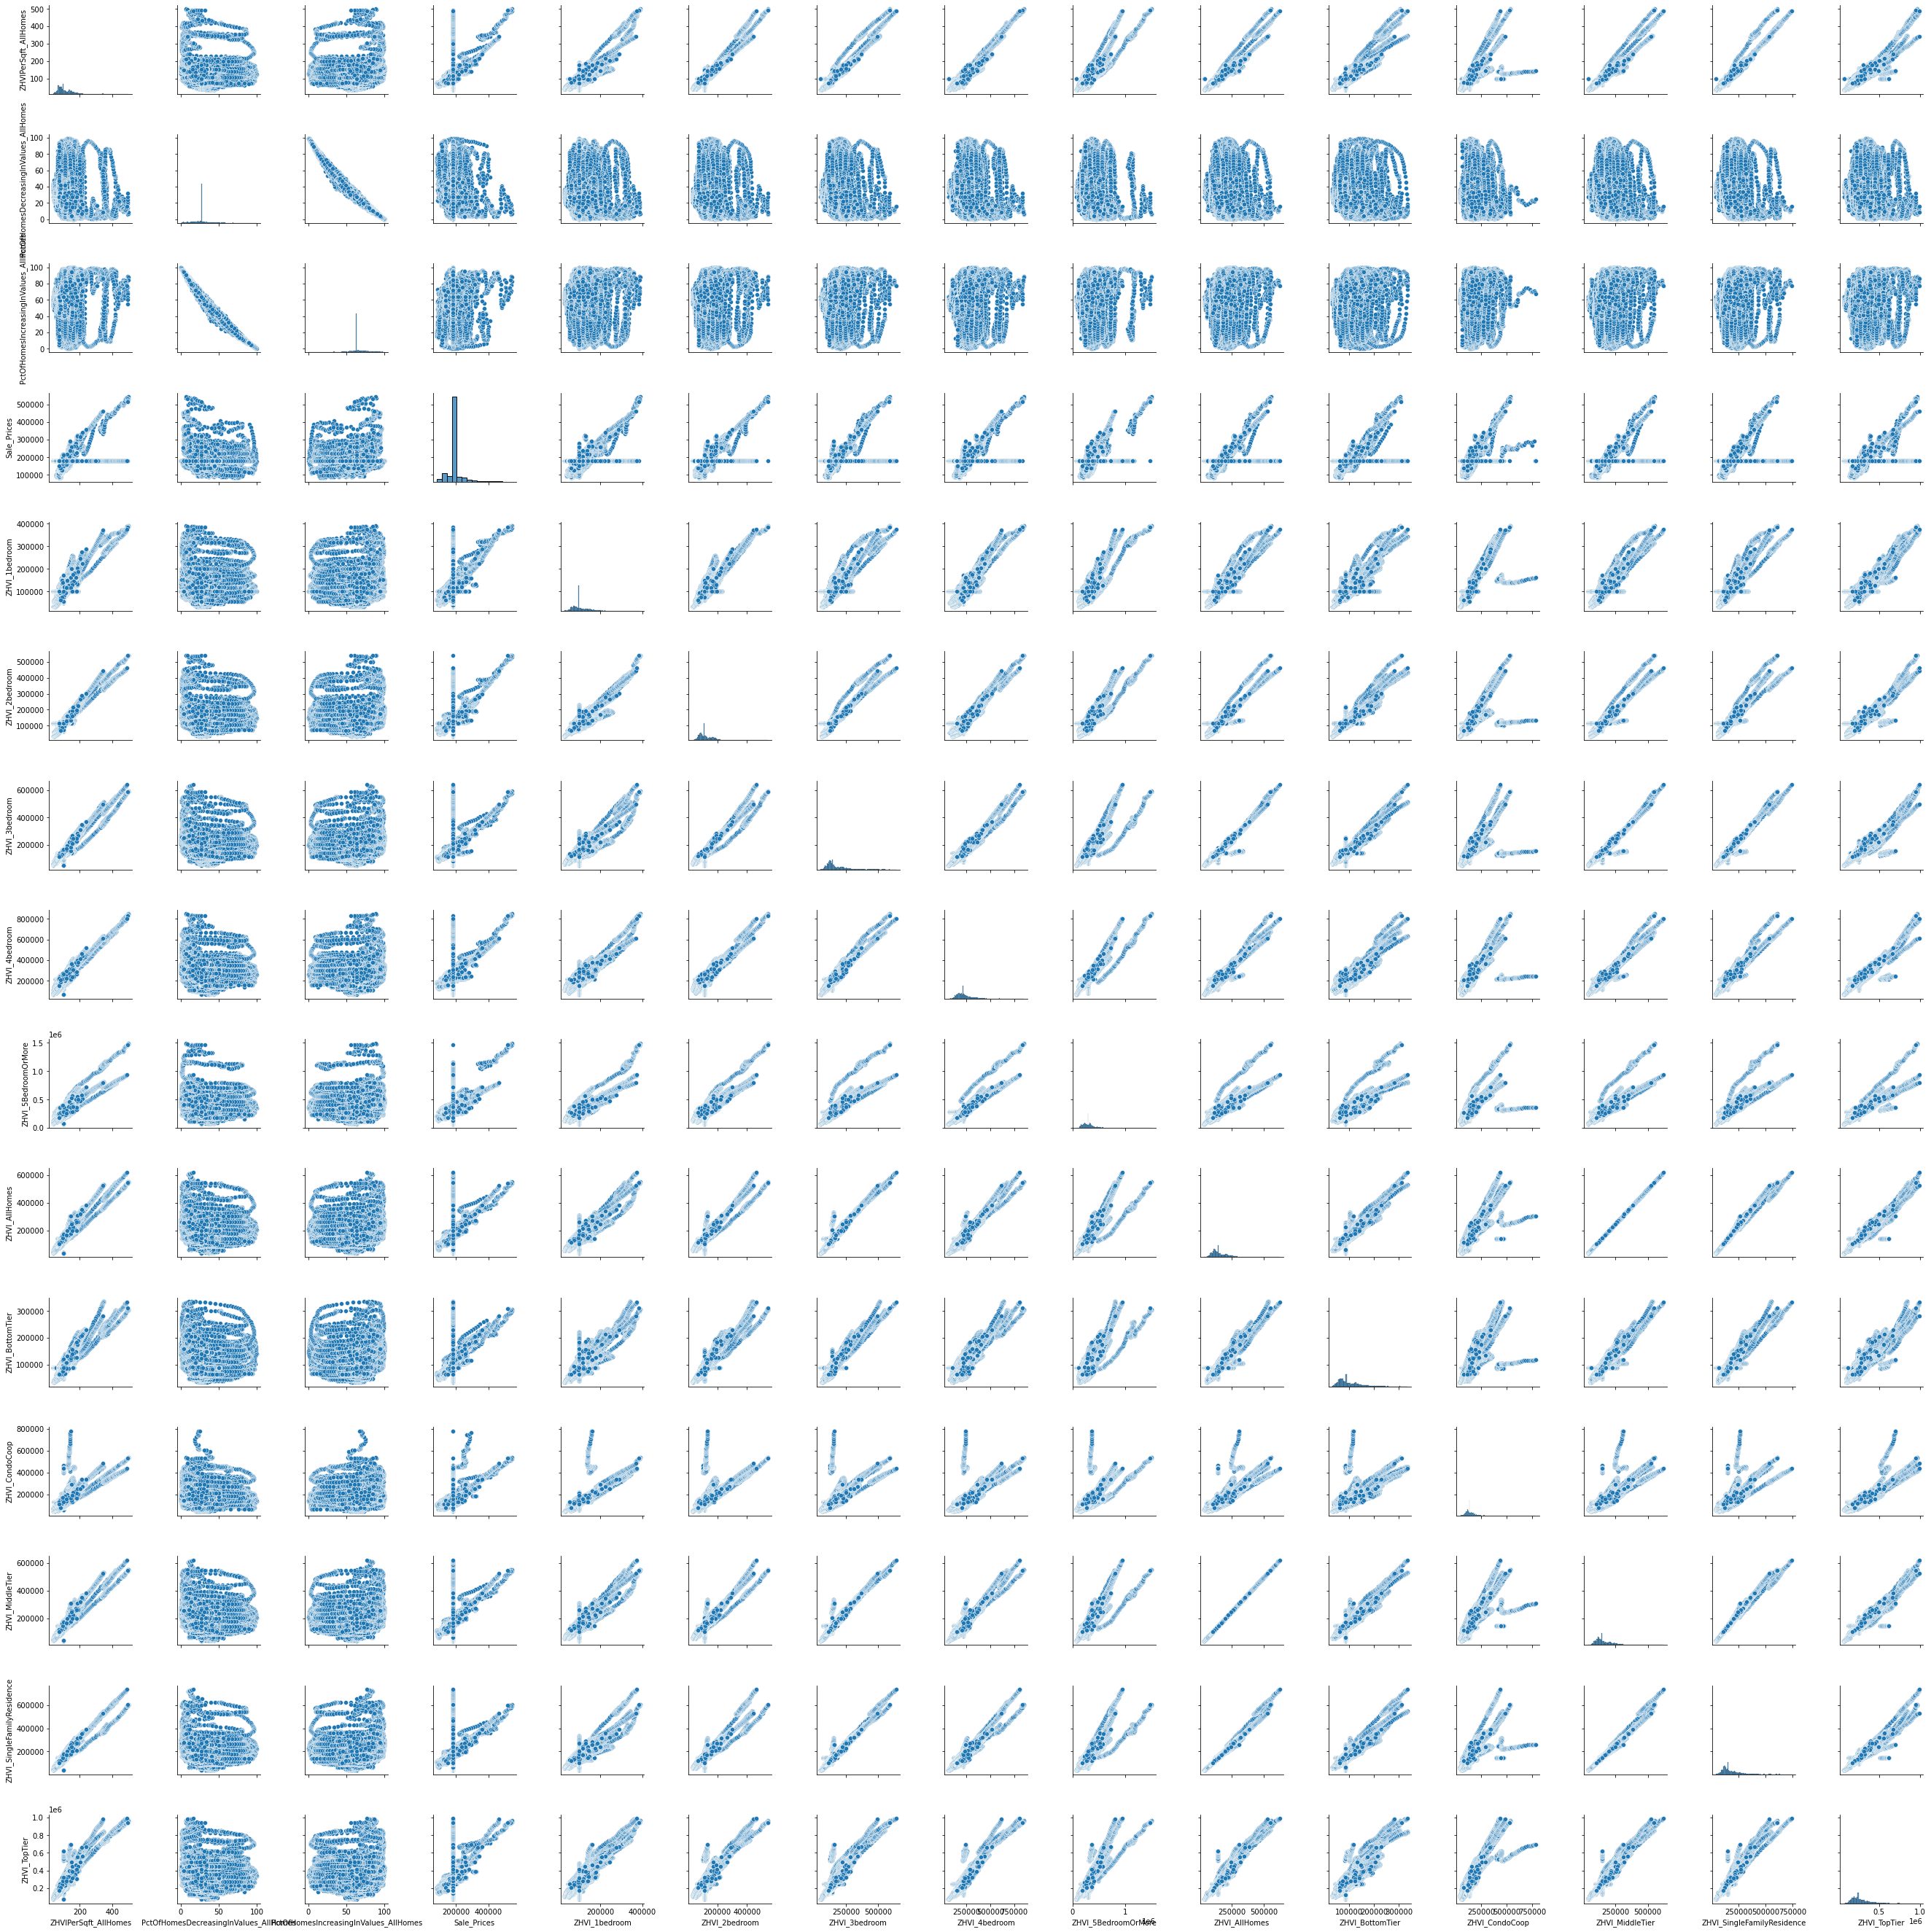

In [17]:
#pair plot to check the colinearity
sns.pairplot(df) 


In [18]:
#Removing 'PctOfHomesIncreasingInValues_AllHomes' column 
df = df.drop('PctOfHomesIncreasingInValues_AllHomes', axis=1)


In [19]:
df.head()

ZHVIPerSqft_AllHomes  PctOfHomesDecreasingInValues_AllHomes  Sale_Prices  \
0                  50.0                                  27.45     180900.0   
1                  62.0                                  27.45     180900.0   
2                  42.0                                  27.45     180900.0   
3                 102.0                                  27.45     180900.0   
4                  82.0                                  27.45     180900.0   

   ZHVI_1bedroom  ZHVI_2bedroom  ZHVI_3bedroom  ZHVI_4bedroom  \
0        61500.0        48900.0        78200.0       146500.0   
1        59200.0        86400.0        96100.0       128400.0   
2        53000.0        54500.0        76800.0       135100.0   
3        93700.0       123400.0       150900.0       196100.0   
4        77800.0        97500.0       129000.0       176100.0   

   ZHVI_5BedroomOrMore  ZHVI_AllHomes  ZHVI_BottomTier  ZHVI_CondoCoop  \
0             206300.0        79500.0          45600.0         99500.0   
1             190500.0       103600.0          67100.0         78900.0   
2             186000.0        64400.0          38400.0         70300.0   
3             265300.0       157900.0          95100.0        136100.0   
4             212900.0       128100.0          82700.0         99400.0   

   ZHVI_MiddleTier  ZHVI_SingleFamilyResidence  ZHVI_TopTier  
0          79500.0                     79000.0      140200.0  
1         103600.0                    107500.0      168700.0  
2          64400.0                     64500.0      115200.0  
3         157900.0                    162000.0      270600.0  
4         128100.0                    133600.0      209300.0

4.3 Spliting the data into Target and predictor variables

In [20]:
#Splitting the columns into Target and Predictor variables
X = df.drop(['Sale_Prices'],axis=1)
Y = df['Sale_Prices']

Here X are the predictor variables and Y is the target variable. Here Y contains the Sales_Price which we are going to predict.

<Figure size 576x360 with 0 Axes>

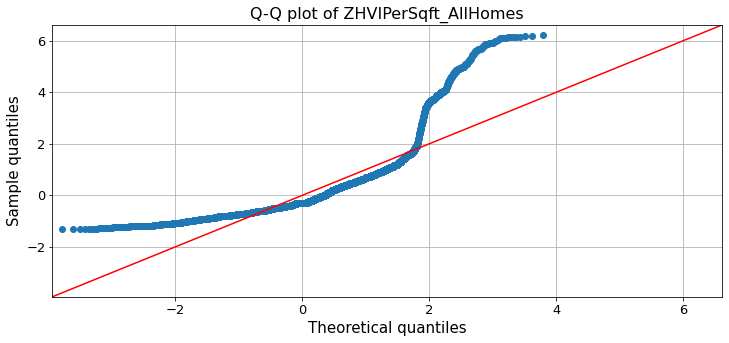

<Figure size 576x360 with 0 Axes>

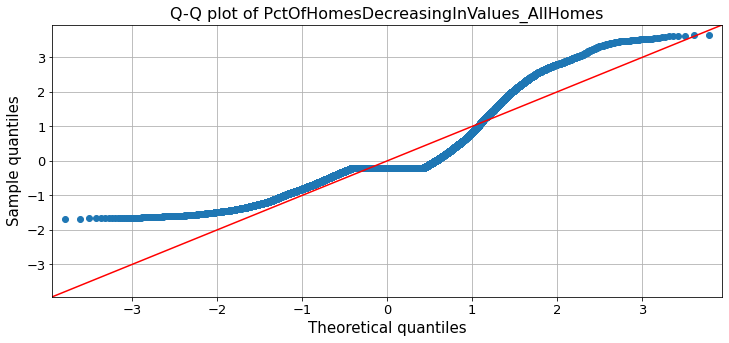

<Figure size 576x360 with 0 Axes>

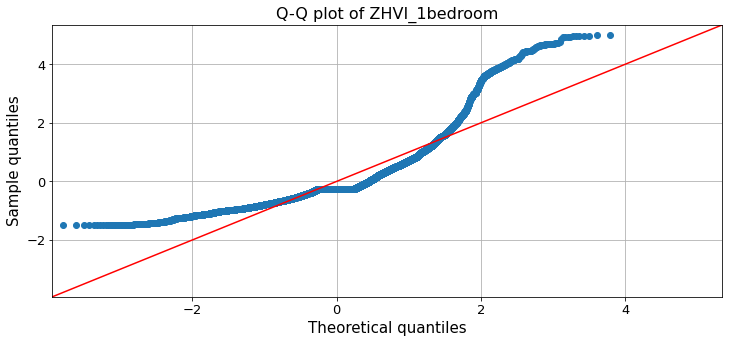

<Figure size 576x360 with 0 Axes>

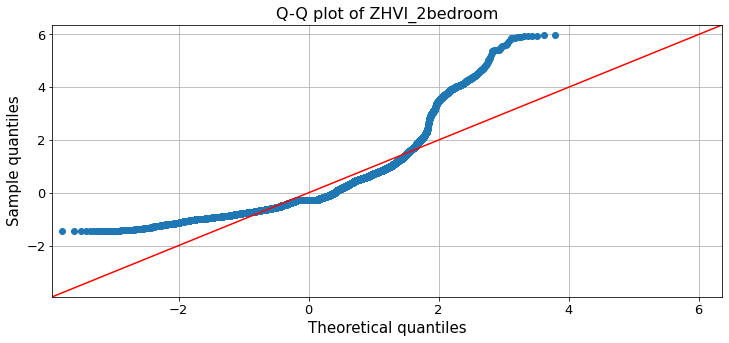

<Figure size 576x360 with 0 Axes>

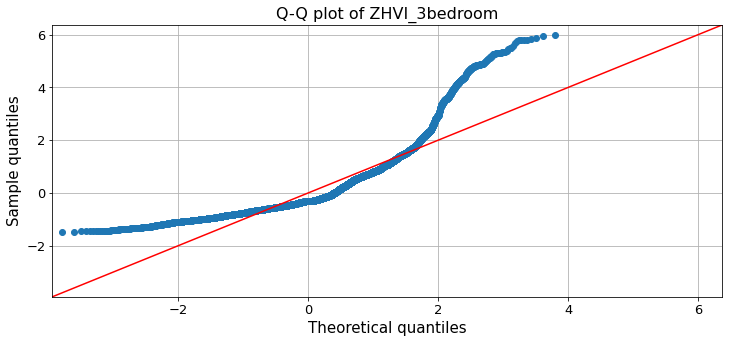

<Figure size 576x360 with 0 Axes>

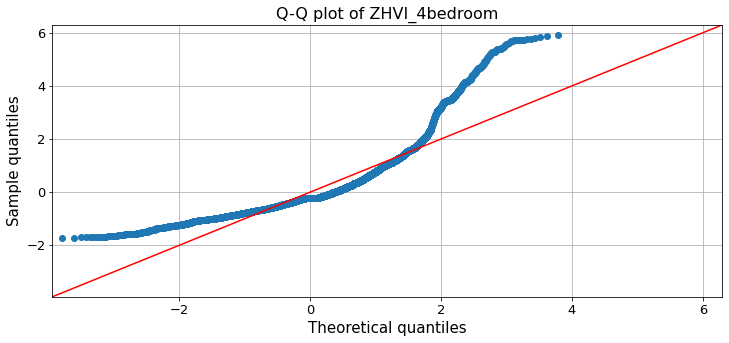

<Figure size 576x360 with 0 Axes>

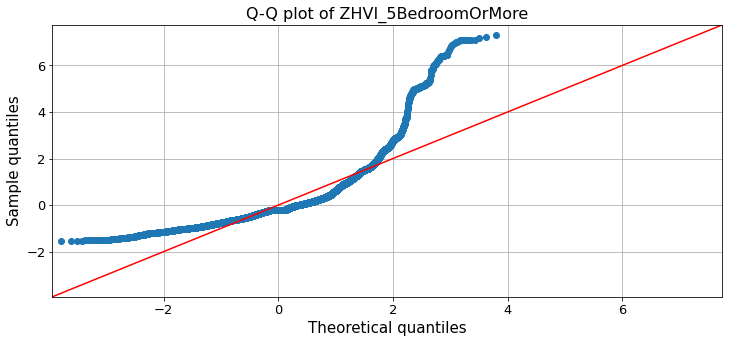

<Figure size 576x360 with 0 Axes>

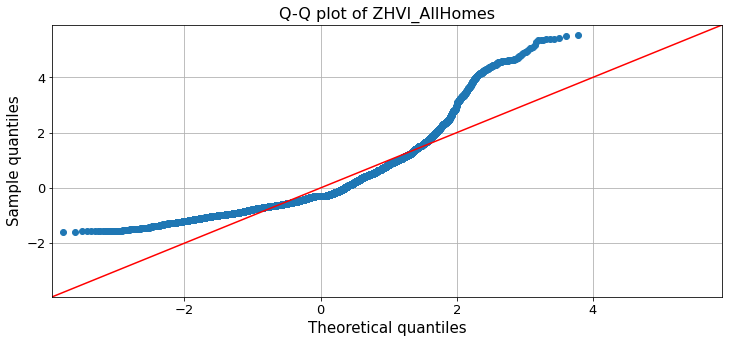

<Figure size 576x360 with 0 Axes>

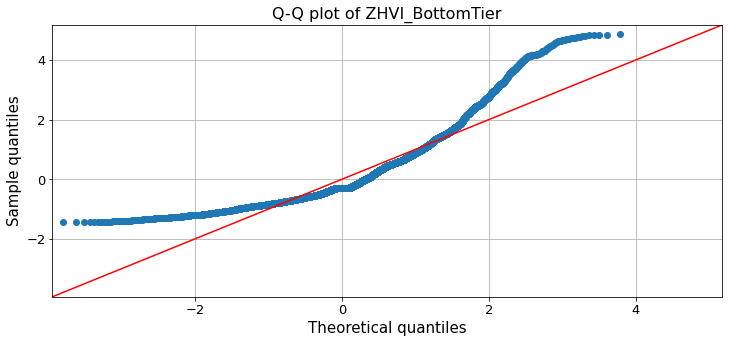

<Figure size 576x360 with 0 Axes>

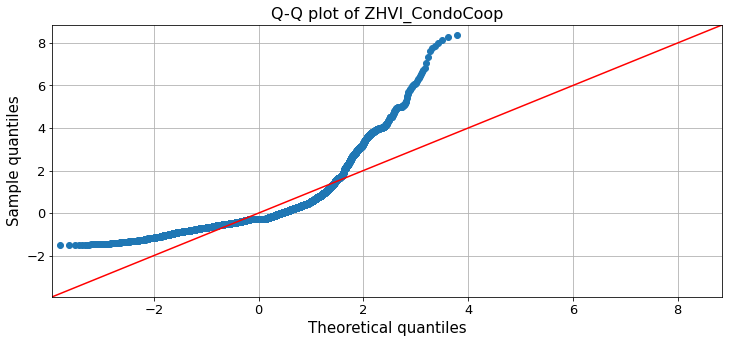

<Figure size 576x360 with 0 Axes>

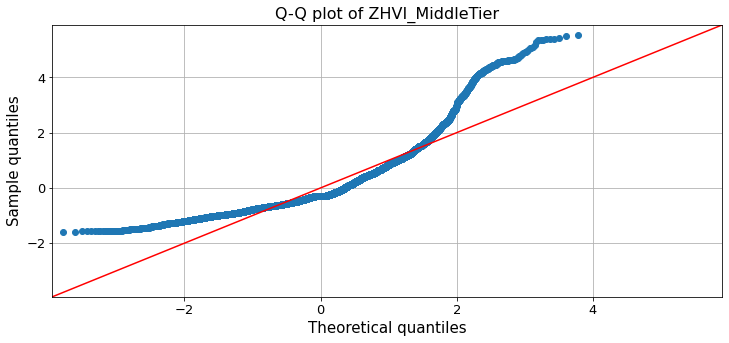

<Figure size 576x360 with 0 Axes>

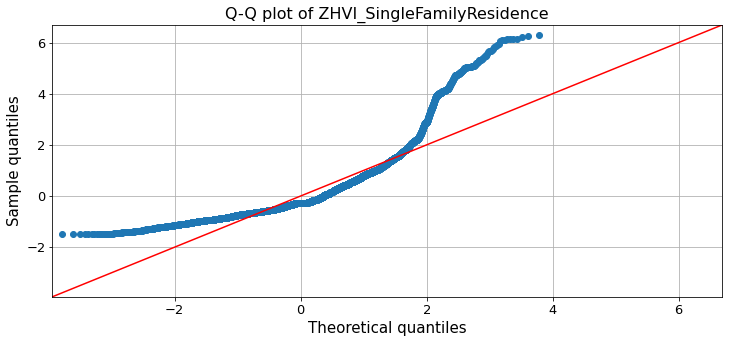

<Figure size 576x360 with 0 Axes>

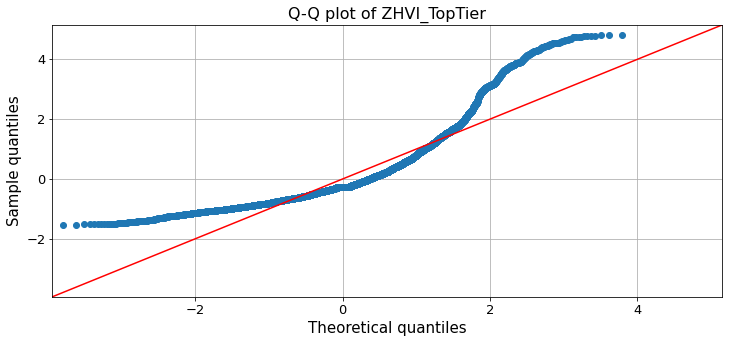

In [21]:
from statsmodels.graphics.gofplots import qqplot

for c in X.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(X[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

Looking at the Q-Q plot above, it appears that all independent variables are roughly following normal distribution

<AxesSubplot:>

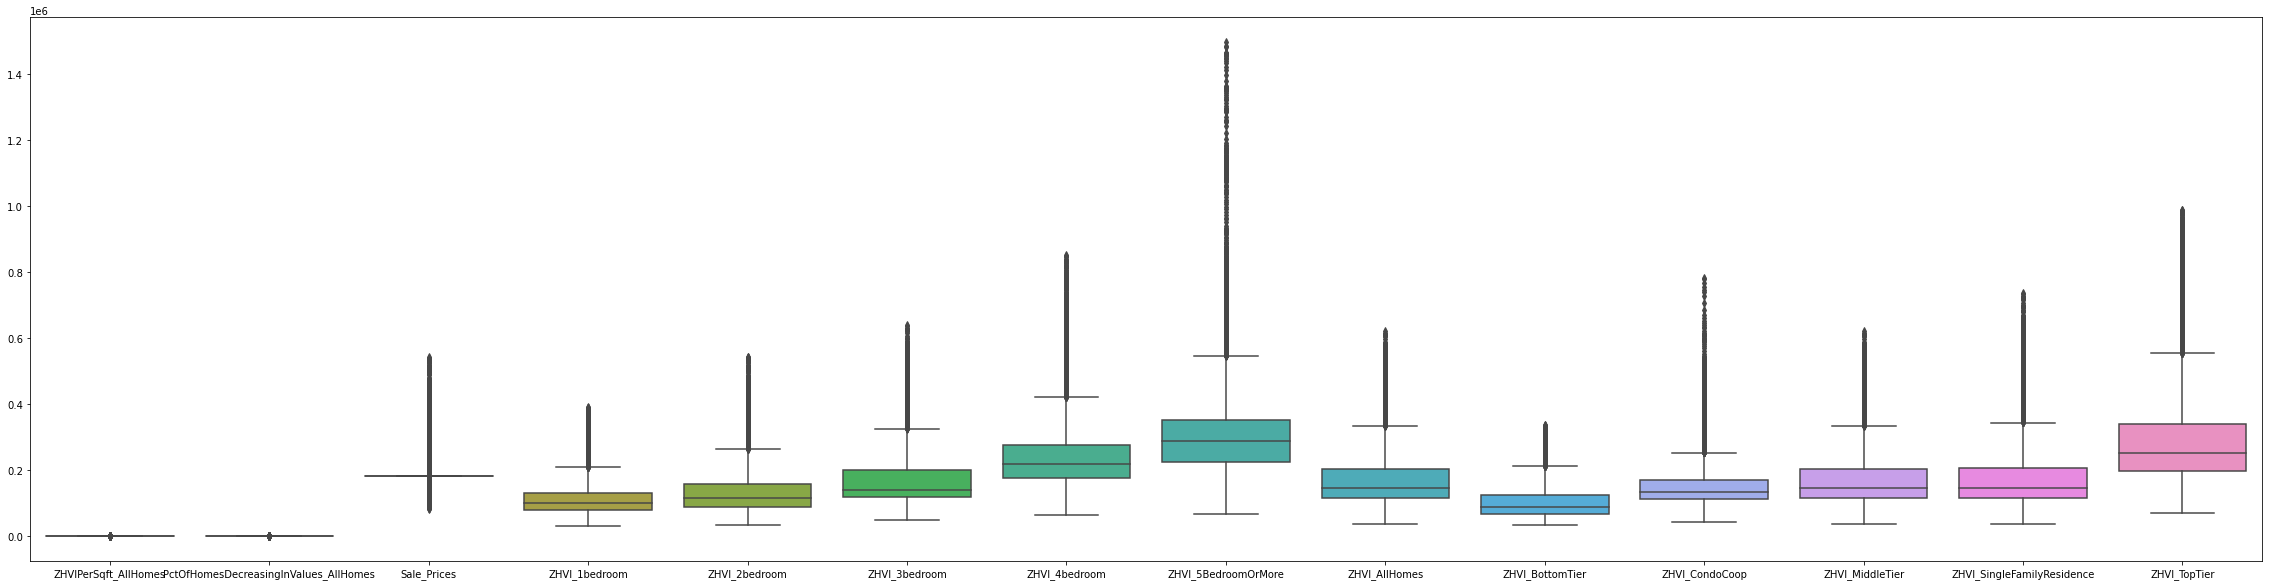

In [22]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(40,10))
sns.boxplot(data=df)

Looking at the plot we can see that all the features have almost the same ranges. Here the 'ZHVI_5BedroomOrMore' and 'ZHVI_TopTier' has the maximum range.

# 5 Feature Selection

5.1 Feature Selection Using Ordinary Least Squares

In [23]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(Y, X, axis =1).fit()

# Print out the statistics
model.summary()

C:\Users\sagar\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['axis']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Sale_Prices   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                          1.674e+04
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                        0.00
Time:                        19:54:18   Log-Likelihood:                     -1.6092e+05
No. Observations:               13212   AIC:                                  3.219e+05
Df Residuals:                   13200   BIC:                                  3.219e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
ZHVIPerSqft_AllHomes                    -21.5351     33.018     -0.652      0.514     -86.256      43.186
PctOfHomesDecreasingInValues_AllHomes   593.5771     20.132     29.485      0.000     554.116     633.038
ZHVI_1bedroom                            -0.2506      0.029     -8.740      0.000      -0.307      -0.194
ZHVI_2bedroom                             0.1059      0.035      3.059      0.002       0.038       0.174
ZHVI_3bedroom                             0.2526      0.036      7.061      0.000       0.182       0.323
ZHVI_4bedroom                             0.7304      0.019     38.874      0.000       0.694       0.767
ZHVI_5BedroomOrMore                      -0.0241      0.008     -2.895      0.004      -0.040      -0.008
ZHVI_AllHomes                             0.6943      0.033     21.116      0.000       0.630       0.759
ZHVI_BottomTier                           0.8985      0.032     27.707      0.000       0.835       0.962
ZHVI_CondoCoop                            0.3866      0.015     25.376      0.000       0.357       0.416
ZHVI_MiddleTier                           0.6943      0.033     21.116      0.000       0.630       0.759
ZHVI_SingleFamilyResidence               -2.1891      0.052    -41.901      0.000      -2.292      -2.087
ZHVI_TopTier                             -0.1514      0.016     -9.404      0.000      -0.183      -0.120
==============================================================================
Omnibus:                     2598.998   Durbin-Watson:                   1.168
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6517.370
Skew:                          -1.084   Prob(JB):                         0.00
Kurtosis:                       5.671   Cond. No.                     3.65e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.14e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In the above code using OLS we find the p-values of every column and determine which features are significant.

The features which have a p-value greater than 0.05 have less significance as it denotes that more than 5% of the values are randomly selected.

In the output above we can see that the column 'ZHVIPerSqft_AllHomes' has a p-value of 0.514 which is the highest, that means it is the least statistically significant.

5.2 Spliting the datase into Train, Validate and Test

In [24]:
#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [25]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)


LinearRegression()

In [26]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)


Mean squared error: 954486637.47
Coefficient of determination: 0.45
R^2 score on tarining set = 0.449966215881458


In [27]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 976933257.18
Coefficient of determination: 0.49
R^2 score on validation set = 0.4945248624064543


In [28]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 1045018035.05
Coefficient of determination: 0.44
R^2 score on test set = 0.43533843000028416


5.4 Understanding the important features

In [29]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

The permutaion importance is also aligned with the P values and PctOfHomesDecreasingInValues_AllHomes, ZHVI_CondoCoop, ZHVI_BottomTier are the most significant features.

# Conclusion and Answer for the following questions
1.Which independent variables are useful to predict a target (dependent variable)?

A: Below are the dependent variables

ZHVI_SingleFamilyResidence

ZHVI_AllHomes

ZHVI_MiddleTier

ZHVI_2bedroom

ZHVI_TopTier

ZHVI_5BedroomOrMore

ZHVI_1bedroom

ZHVIPerSqft_AllHomes

ZHVI_4bedroom

ZHVI_3bedroom

PctOfHomesDecreasingInValues_AllHomes

ZHVI_CondoCoop

ZHVI_BottomTier

2.Which independent variables have missing data? How much

A: All the features except Date and RegionName have missing value in them.

Detailed report of the count and percentage of the missing value can be found in the section 4.2.

3.Do the training and test sets have the same data?

A: Yes, most of the data are same in test, train and validation data set except the volumme of data in the three.

4.In the predictor variables independent of all the other predictor variables?

A: No, they are not independet of each other. There is multi - collinearity among lot of the independent variable which is shown 
by the correlation table and pairplot map

5.Which predictor variables are the most important?

A:

ZHVI_SingleFamilyResidence

ZHVI_AllHomes

ZHVI_MiddleTier

ZHVI_2bedroom

ZHVI_TopTier

ZHVI_5BedroomOrMore

ZHVI_1bedroom

ZHVI_4bedroom

ZHVI_3bedroom

PctOfHomesDecreasingInValues_AllHomes

ZHVI_CondoCoop

ZHVI_BottomTier


6.Do the ranges of the predictor variables make sense?

A:

Yes the predictor variables ranges make sense as the majority of the data is filled by the median values.

7.What are the distributions of the predictor variables?

A:

Looking at the Q-Q plots, it appears that all independednt variables are roughly following normal distribution.
